In [ ]:
import os

base_dir = "/content/drive/MyDrive/DeepLearning/image"

train_dir = os.path.join(base_dir,'train')

test_dir = os.path.join(base_dir,'test')

list_face = os.listdir(train_dir)

for item in list_face:
    temp = os.path.join(train_dir, item)
    print('images in {} : {}'.format(item, len(os.listdir(temp))))


images in MinhNgo : 652
images in Phuc : 836


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(2,activation="softmax"))
model.layers[0].trainable = False 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(lr = 0.05, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    rotation_range=20,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    brightness_range=[0.2,1.0],
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest")



In [ ]:
train_generator = data_generator.flow_from_directory('/content/drive/MyDrive/DeepLearning/image/train',
                                                    target_size=(image_size,image_size),
                                                    batch_size = 16,
                                                    class_mode='categorical')

validation_generator = data_generator.flow_from_directory('/content/drive/MyDrive/DeepLearning/image/test',
                                                    target_size=(image_size,image_size),
                                                    batch_size = 16,
                                                    class_mode='categorical')

Found 1488 images belonging to 2 classes.
Found 370 images belonging to 2 classes.


In [ ]:
fit_history = model.fit(
        train_generator,
        epochs = 5,
        validation_data=validation_generator,
        validation_steps=2
)

Epoch 1/5
93/93 [==============================] - 742s 8s/step - loss: 4.0836 - accuracy: 0.8642 - val_loss: 0.1415 - val_accuracy: 0.9375
Epoch 2/5
93/93 [==============================] - 44s 478ms/step - loss: 0.0930 - accuracy: 0.9926 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
93/93 [==============================] - 43s 468ms/step - loss: 0.1043 - accuracy: 0.9918 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
93/93 [==============================] - 41s 437ms/step - loss: 0.0693 - accuracy: 0.9939 - val_loss: 2.2496e-05 - val_accuracy: 1.0000
Epoch 5/5
93/93 [==============================] - 38s 414ms/step - loss: 0.1585 - accuracy: 0.9885 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [ ]:
model.save("/content/drive/MyDrive/TrainImage/model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/TrainImage/model/assets


In [ ]:
# from tensorflow import keras 

# model = keras.models.load_model('/content/drive/MyDrive/TrainImage/model')
# from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image_size = 224

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    rotation_range=45,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest")

In [ ]:
import numpy as np
import cv2 

test_generator = data_generator.flow_from_directory(
    directory = '/content/drive/MyDrive/TrainImage/image/test',
    target_size = (image_size, image_size),
    batch_size = 20,
    class_mode = None,
    shuffle = False,
    seed = 123
)

filenames = test_generator.filenames


Found 231 images belonging to 3 classes.


In [ ]:
test_generator.reset()

pred = model.predict(test_generator, verbose = 1)

predicted_class_indices = np.argmax(pred, axis=1)

12/12 [==============================] - 26s 2s/step


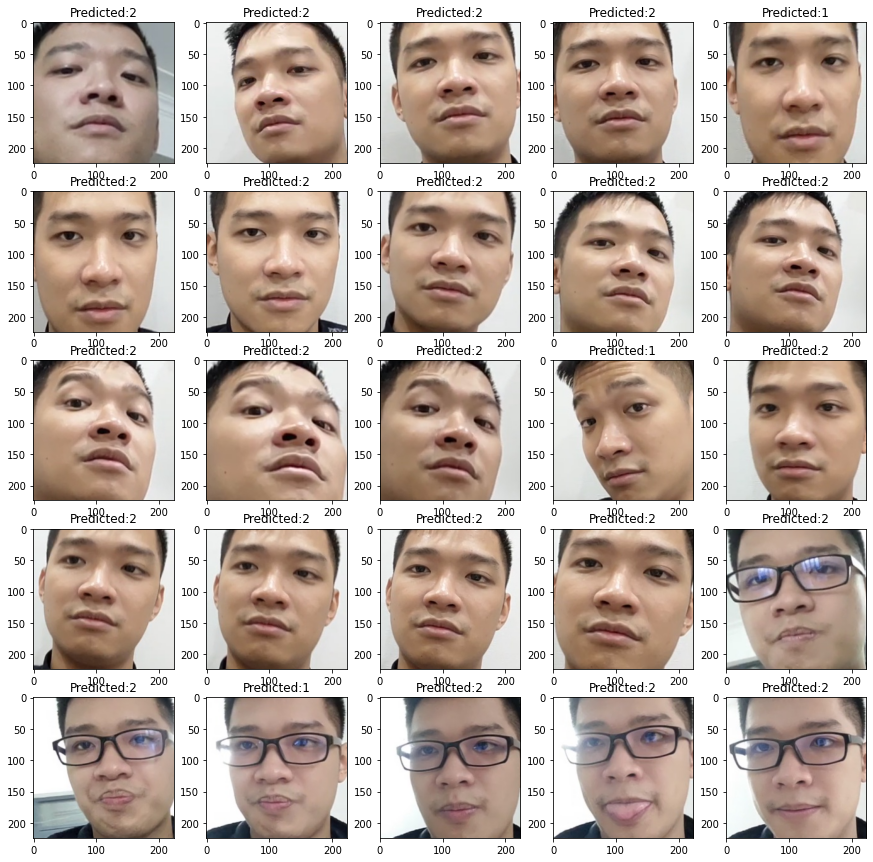

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 

TEST_DIR = '/content/drive/MyDrive/TrainImage/image/test/'
f, ax = plt.subplots(5, 5, figsize = (15, 15))
n = 200
for i in range(n,n+25):
    imgBGR = cv2.imread(TEST_DIR + test_generator.filenames[i])
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    
    predicted_class = predicted_class_indices[i]

    ax[(i-n)//5, (i-n)%5].imshow(imgRGB)
    ax[(i-n)//5, (i-n)%5].set_title("Predicted:{}".format(predicted_class))    

plt.show() 